# Лабораторная работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студенты гр. 2383 Жданов Антон Константинович и Ильин Павел Олегович. Вариант №13.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

1. Дискретизация непрерывного сигнала


Пусть задан непрерывный сигнал\
$
x(t)= \sum_{k=1}^{M} A_k \cos(\omega_k t + \varphi_k).
$

Дискретизация с шагом времени (T) приводит к получению дискретной
последовательности:

$
x[n] = x(nT) = \sum_{k=1}^{M} A_k \cos(\omega_k nT + \varphi_k).
$

При (T = 1): $
x[n] = \sum_{k=1}^{M} A_k \cos(\omega_k n + \varphi_k).
$

## 2. Дискретное преобразование Фурье (ДПФ)

ДПФ вычисляется по формуле: $
X[k] = \sum_{n=0}^{N-1} x[n] e^{-j 2\pi kn / N}.
$

Амплитудный спектр: $
|X[k]|.
$

## 3. Рекурсивные фильтры


* Численное дифференцирование 1-го порядка:

$
y_n = \frac{s_{n+1} - s_{n-1}}{2h}
$

$
H(w) = i\sin(w)
$

* Формула прямоугольников:

$
y_{n+1} = y_n + s_{n+\frac{1}{2}}, \quad y_0 = 0
$

$
H(w) = \frac{1}{2+i\sin(0.5w)}
$

* Формула трапеций:

$
y_{n+1} = y_n + \frac{1}{2}(s_n + s_{n+1}), \quad y_0 = 0
$

$
H(w) = \frac{\cos(0.5w)}{2+i\sin(0.5w)}
$

* Формула Симпсона:

$
y_{n+1} = y_{n-1} + \frac{1}{3}(s_{n-1} + 4s_n + s_{n+1}), \quad y_0 = 0
$

$
H(w) = \frac{2+\cos(w)}{3+i\sin(w)}
$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Задание 1
Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_kcos(\omega_kt+\varphi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$,изменяющимися с шагом $Δ\omega=0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета (N=31).

In [31]:
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(42)

In [32]:
T = 1
n = 11
N = 32
dw = np.pi * 0.1
A = np.array(random.sample(range(1, 12), 11))
A_norm = A / sum(A)
w = np.arange(0, np.pi + 1e-12, dw)

phi = np.array([random.uniform(0.0, 0.5) for _ in range(n)], dtype=float)

def gen_signal(k):
  return np.sum([A_norm[i] * np.cos(w[i] * k + phi[i]) for i in range(n)])

x_analog = np.arange(0, N, 0.001)
Y_analog = [gen_signal(i) for i in x_analog]

x_discrete = np.arange(N)
Y_discrete = [gen_signal(i) for i in x_discrete]

## Задание 2
Визуализировать исходные аналоговый и дискретизированный сигналы.

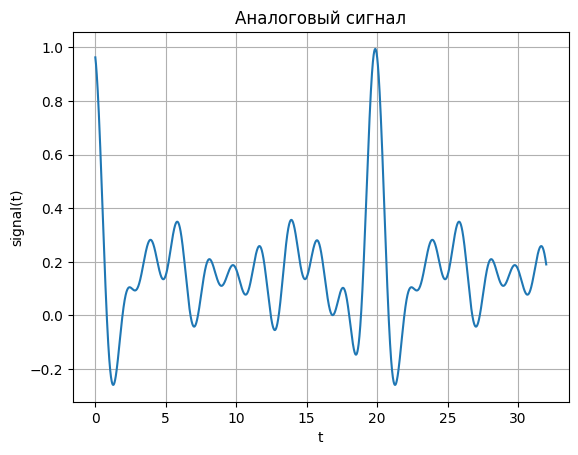

In [33]:
plt.plot(x_analog, Y_analog)
plt.title('Аналоговый сигнал')
plt.xlabel('t')
plt.ylabel('signal(t)')
plt.grid()
plt.show()

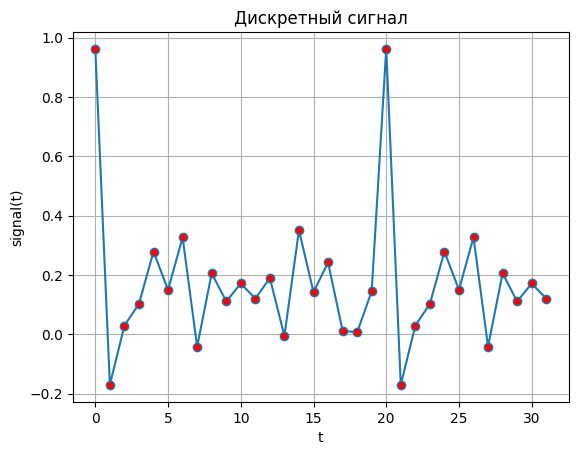

In [34]:
plt.plot(x_discrete, Y_discrete, marker='o', markerfacecolor='red')
plt.title("Дискретный сигнал")
plt.xlabel('t')
plt.ylabel('signal(t)')
plt.grid()
plt.show()

## Задание 3
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

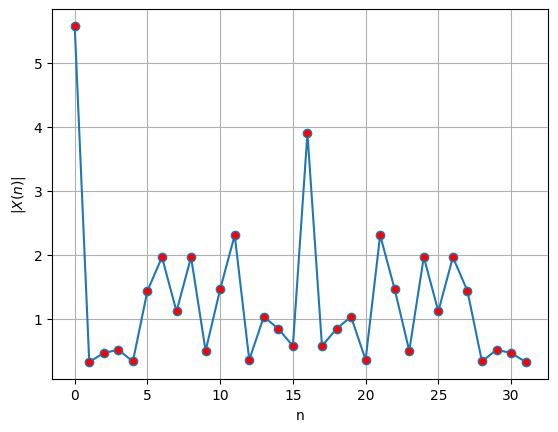

In [35]:
def DFT(x):
    """
    Ручная реализация ДПФ:
        X[k] = sum_{n=0}^{N-1} x[n] * exp(-j 2π k n / N), k=0..N-1
    Возвращает массив комплексных значений X.
    """
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        n = np.arange(N)
        exponent = -2j * np.pi * k * n / N
        X[k] = np.sum(x * np.exp(exponent))
    return X

plt.figure()
plt.plot(x_discrete, np.abs(DFT(Y_discrete)), marker='o', markerfacecolor='red')
plt.xlabel('n')
plt.ylabel('$|X(n)|$')
plt.grid()
plt.show()

## Задание 4
Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

In [36]:
def smooth5(x):
    x = np.asarray(x, dtype=float)
    kernel = np.ones(5, dtype=float) / 5.0
    y = np.convolve(x, kernel, mode='same')
    return y

def smooth9(x):
    """
    Сглаживание по 9 точкам с нулевым дополнением (деление всегда на 9).
    Аналог исходной функции для 5 точек.
    """
    x = np.asarray(x, dtype=float)
    kernel = np.ones(9, dtype=float) / 9.0
    y = np.convolve(x, kernel, mode='same')
    return y

## Задание 5
Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

[]

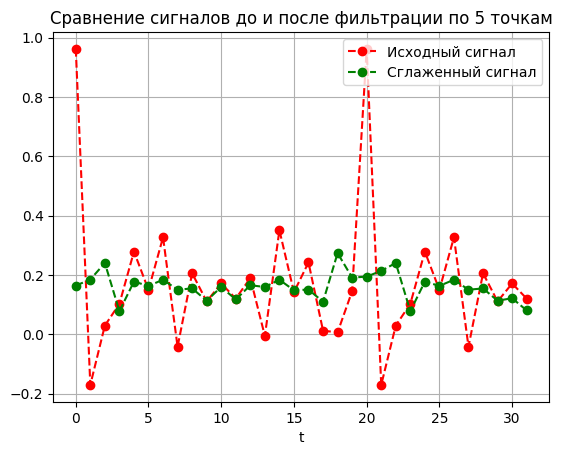

In [37]:
plt.plot(x_discrete, Y_discrete, linestyle='--', color='red', marker='o', label='Исходный сигнал')
plt.plot(x_discrete, smooth5(Y_discrete), linestyle='--', color='green', marker='o', label='Сглаженный сигнал')
plt.legend(loc='upper right')
plt.grid()
plt.title('Сравнение сигналов до и после фильтрации по 5 точкам')
plt.xlabel('t')
plt.plot()

[]

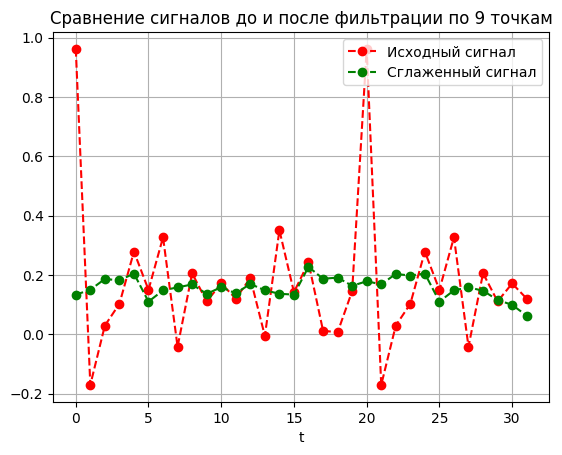

In [38]:
plt.plot(x_discrete, Y_discrete, linestyle='--', color='red', marker='o', label='Исходный сигнал')
plt.plot(x_discrete, smooth9(Y_discrete), linestyle='--', color='green', marker='o', label='Сглаженный сигнал')
plt.legend(loc='upper right')
plt.grid()
plt.title('Сравнение сигналов до и после фильтрации по 9 точкам')
plt.xlabel('t')
plt.plot()

## Задание 6
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

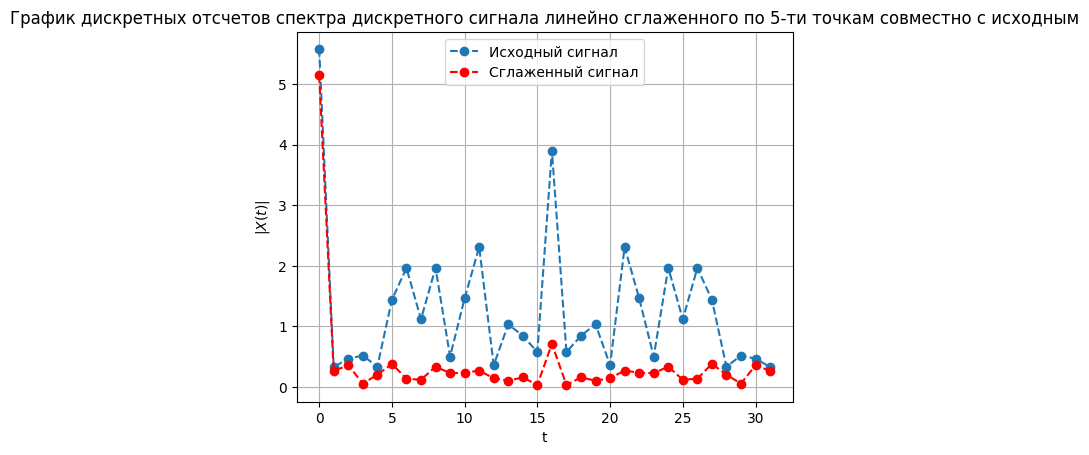

In [39]:
plt.figure()
plt.plot(x_discrete, np.abs(DFT(Y_discrete)), linestyle='--', marker='o', label='Исходный сигнал')
plt.plot(x_discrete, np.abs(DFT(smooth5(Y_discrete))), color='red', linestyle='--', marker='o', label='Сглаженный сигнал')
plt.xlabel('t')
plt.ylabel('$|X(t)|$')
plt.title('График дискретных отсчетов спектра дискретного сигнала линейно сглаженного по 5-ти точкам совместно с исходным')
plt.legend(loc='upper center')
plt.grid()
plt.show()

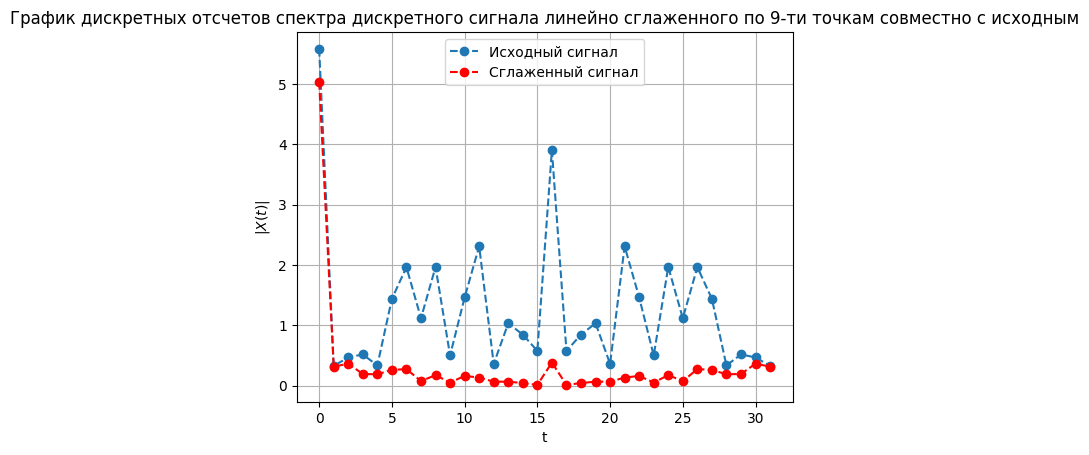

In [40]:
plt.figure()
plt.plot(x_discrete, np.abs(DFT(Y_discrete)), linestyle='--', marker='o', label='Исходный сигнал')
plt.plot(x_discrete, np.abs(DFT(smooth9(Y_discrete))), color='red', linestyle='--', marker='o', label='Сглаженный сигнал')
plt.xlabel('t')
plt.ylabel('$|X(t)|$')
plt.title('График дискретных отсчетов спектра дискретного сигнала линейно сглаженного по 9-ти точкам совместно с исходным')
plt.legend(loc='upper center')
plt.grid()
plt.show()

## Задание 7
Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

Спектр после индекса 16 дублирует первую половину (симметрия модуля ДПФ для вещественной последовательности), поэтому анализ ограничивается первой половиной.
Применение 5‑точечного фильтра оставляет низкочастотную энергию почти неизменной, но заметно снижает амплитуды остальных гармоник: пики становятся ниже, однако структура ещё частично повторяет исходную.
9‑точечное усреднение действует более жёстко: практически все средние и высокочастотные компоненты подавлены, форма спектра сглаженного сигнала сильно отличается от исходной.
Поведение согласуется с формулой передаточной функции скользящего среднего: увеличение длины окна уменьшает ширину главного лепестка и усиливает подавление за его пределами — отсюда более сильное сглаживание при L=9.

## Задание 8(а)


Формула численного дифференцирования 1-ого порядка:

$
y_n' = \frac{y_{n+1} - y_{n-1}}{2h}, \quad h = T
$

Формула передаточной функции $ H(\omega) $ для данного фильтра:

Так как $ s_n = e^{i\omega n} $:

$
\begin{aligned}
y_n' &= \frac{y_{n+1} - y_{n-1}}{2h} \\
&= \frac{e^{i\omega(n+1)} - e^{i\omega(n-1)}}{2h} \\
&= \frac{e^{i\omega} - e^{-i\omega}}{2h} \cdot e^{ni\omega} \\
&= H(\omega) \cdot e^{ni\omega}
\end{aligned}
$

$
\begin{aligned}
H(\omega) &= \frac{e^{i\omega} - e^{-i\omega}}{2h} \\
&= \frac{\cos(\omega) + i\sin(\omega) - (\cos(\omega) - i\sin(\omega))}{2h} \\
&= \frac{2i\sin(\omega)}{2h} \\
&= \frac{i\sin(\omega)}{h}
\end{aligned}
$

Так как \( T = 1 \), получаем:

$
y_n' = \frac{y_{n+1} - y_{n-1}}{2}
$

$
H(\omega) = i\sin(\omega)
$

### Задание 4.

In [41]:
def numerical_df(x):
  y = np.zeros_like(x)
  y[0] = x[0]
  for i in range(1,len(x)-1):
      y[i] = (x[i+1] - x[i-1])/2
  y[len(x)-1] = x[len(x)-1]
  return y

discrete_signal_numerical_df = numerical_df(Y_discrete)

### Задание 5

[]

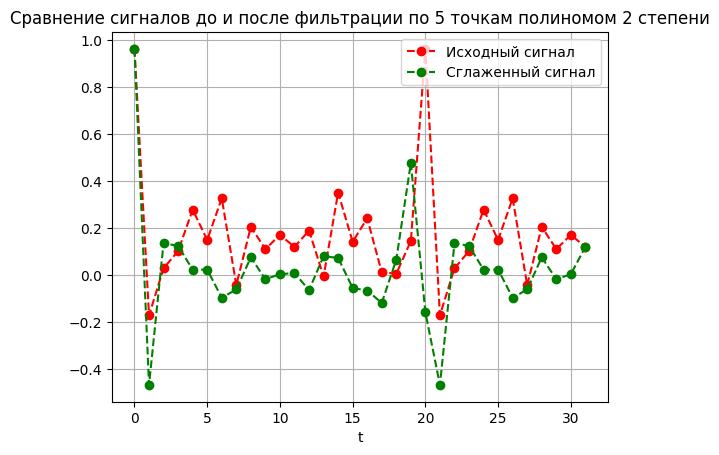

In [42]:
plt.plot(x_discrete, Y_discrete, linestyle='--', color='red', marker='o', label='Исходный сигнал')
plt.plot(x_discrete, numerical_df(Y_discrete), linestyle='--', color='green', marker='o', label='Сглаженный сигнал')
plt.legend(loc='upper right')
plt.grid()
plt.title('Сравнение сигналов до и после фильтрации по 5 точкам полиномом 2 степени')
plt.xlabel('t')
plt.plot()

### Задание 6

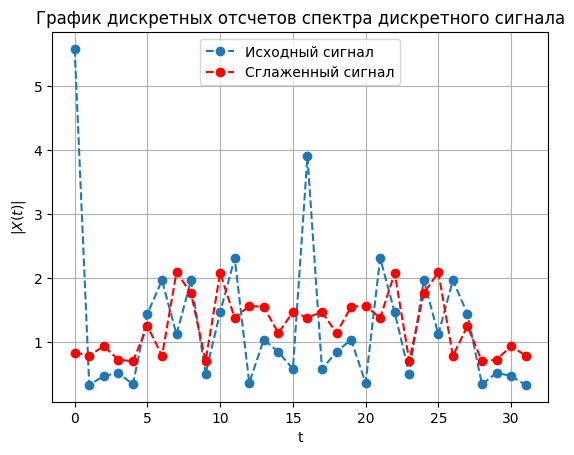

In [43]:
plt.figure()
plt.plot(x_discrete, np.abs(DFT(Y_discrete)), linestyle='--', marker='o', label='Исходный сигнал')
plt.plot(x_discrete, np.abs(DFT(numerical_df(Y_discrete))), color='red', linestyle='--', marker='o', label='Сглаженный сигнал')
plt.xlabel('t')
plt.ylabel('$|X(t)|$')
plt.title('График дискретных отсчетов спектра дискретного сигнала')
plt.legend(loc='upper center')
plt.grid()
plt.show()

### Задание 7

Анализируя симметричный спектр, где вторая половина после 16-го отсчета зеркальна первой, мы ограничиваемся рассмотрением только этой первой половины. Полученный после фильтрации методом численного дифференцирования первого порядка сигнал в целом повторяет форму исходного, демонстрируя ослабление и сглаживание его пиков, при этом на краях наблюдается подавление — ожидаемый эффект, обусловленный принятым условием равенства сигнала нулю за пределами заданного диапазона, что полностью соответствует теоретическим значениям передаточной функции.

## Задание 8(б)




**Дискретный фильтр, соответствующий численному интегрированию по формуле прямоугольников:**

$
y_{n+1} = y_n + s_{n+\frac{1}{2}}, \quad y_0 = 0
$

**Передаточная функция дискретного фильтра, соответствующего численному интегрированию по формуле прямоугольников:**

$
H(\omega) = \frac{1}{2i\sin(0.5\omega)}
$

**Дискретный фильтр, соответствующий численному интегрированию по формуле трапеций:**

$
y_{n+1} = y_n + \frac{1}{2}(s_n + s_{n+1}), \quad y_0 = 0
$

**Передаточная функция дискретного фильтра, соответствующего численному интегрированию по формуле трапеций:**

$
H(\omega) = \frac{\cos(0.5\omega)}{2i\sin(0.5\omega)}
$

**Дискретный фильтр, соответствующий численному интегрированию по формуле Симпсона:**

$
y_{n+1} = y_{n-1} + \frac{1}{3}(s_{n-1} + 4s_n + s_{n+1}), \quad y_0 = 0
$

**Передаточная функция дискретного фильтра, соответствующего численному интегрированию по формуле Симпсона:**

$
H(\omega) = \frac{2i\cdot \cos(\omega)}{3\cdot 2i\sin(\omega)} = \frac{\cos(\omega)}{3\sin(\omega)}
$

### Задание 4

In [44]:
#прямоугольник и трапеция
def rectangle_and_trapeze(x):
  y = [0]
  for n in range(0, N - 1):
    y.append(y[n] + (x[n] + x[n + 1]) / 2)
  return y

#  Симпсона
def Simpson(x):
  y = [0, 0]
  for n in range(2, N):
    y.append(y[n - 2] + (x[n - 2] + 4 * x[n - 1] + x[n]) / 3)
  return y

### Задание 5

[]

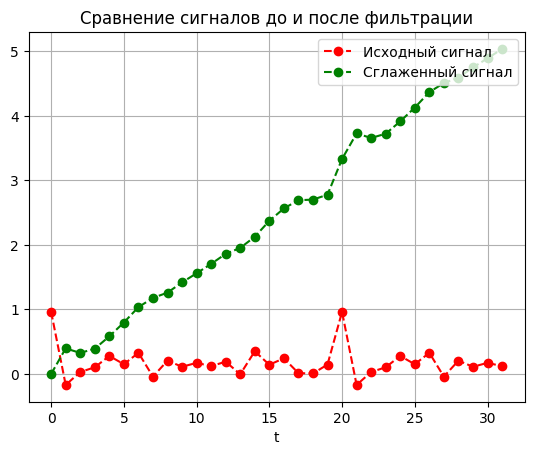

In [45]:
plt.plot(x_discrete, Y_discrete, linestyle='--', color='red', marker='o', label='Исходный сигнал')
plt.plot(x_discrete, rectangle_and_trapeze(Y_discrete), linestyle='--', color='green', marker='o', label='Сглаженный сигнал')
plt.legend(loc='upper right')
plt.grid()
plt.title('Сравнение сигналов до и после фильтрации')
plt.xlabel('t')
plt.plot()

[]

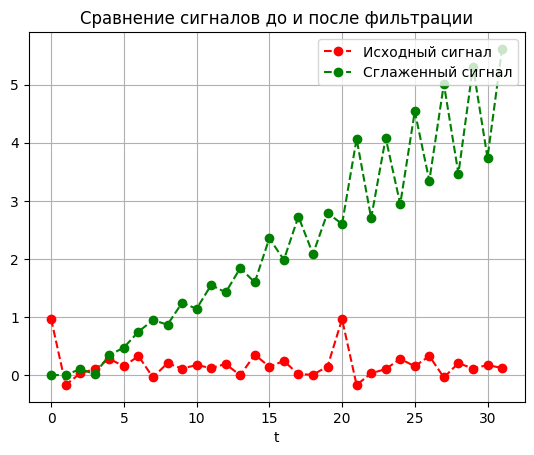

In [46]:
plt.plot(x_discrete, Y_discrete, linestyle='--', color='red', marker='o', label='Исходный сигнал')
plt.plot(x_discrete, Simpson(Y_discrete), linestyle='--', color='green', marker='o', label='Сглаженный сигнал')
plt.legend(loc='upper right')
plt.grid()
plt.title('Сравнение сигналов до и после фильтрации')
plt.xlabel('t')
plt.plot()

### Задание 6

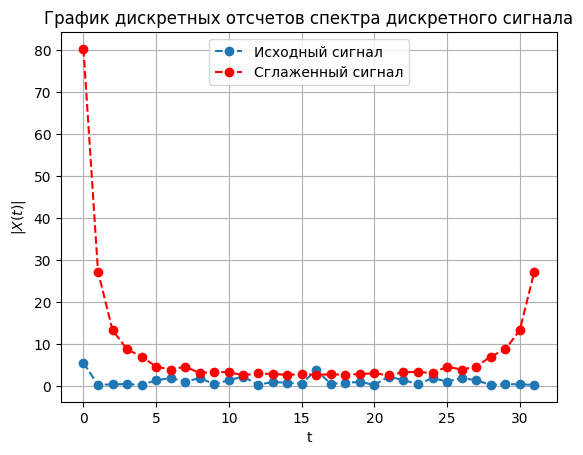

In [47]:
plt.figure()
plt.plot(x_discrete, np.abs(DFT(Y_discrete)), linestyle='--', marker='o', label='Исходный сигнал')
plt.plot(x_discrete, np.abs(DFT(rectangle_and_trapeze(Y_discrete))), color='red', linestyle='--', marker='o', label='Сглаженный сигнал')
plt.xlabel('t')
plt.ylabel('$|X(t)|$')
plt.title('График дискретных отсчетов спектра дискретного сигнала')
plt.legend(loc='upper center')
plt.grid()
plt.show()

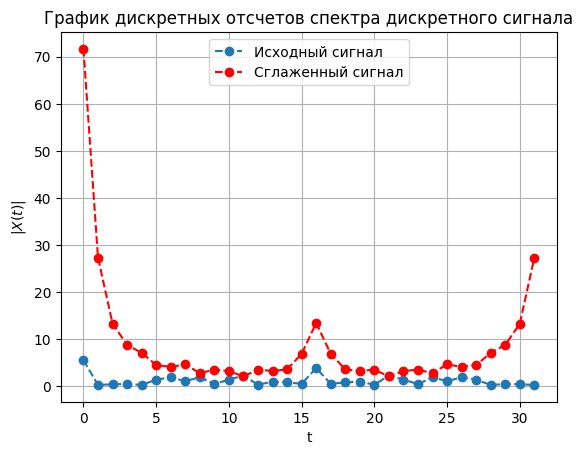

In [48]:
plt.figure()
plt.plot(x_discrete, np.abs(DFT(Y_discrete)), linestyle='--', marker='o', label='Исходный сигнал')
plt.plot(x_discrete, np.abs(DFT(Simpson(Y_discrete))), color='red', linestyle='--', marker='o', label='Сглаженный сигнал')
plt.xlabel('t')
plt.ylabel('$|X(t)|$')
plt.title('График дискретных отсчетов спектра дискретного сигнала')
plt.legend(loc='upper center')
plt.grid()
plt.show()

### Задание 7

Наблюдаемая симметрия спектра относительно точки с индексом 16 позволяет ограничить анализ только его первой половиной. Фильтры численного интегрирования — прямоугольников, трапеций и Симпсона — демонстрируют схожий основной эффект: резкое усиление низкочастотных составляющих и подавление колебаний на средних частотах. Однако метод Симпсона отличается от двух других тем, что дополнительно усиливает высокочастотную часть спектра. Такое поведение объясняется характером передаточных функций, графики которых приближаются к асимптотическим значениям, близким к 0 и 0.5, что в целом согласуется с теоретическими расчетами
|H(ω)|

## Задание 9

В ходе работы были исследованы рекурсивные фильтры для выполнения математических операций с дискретными сигналами.

Дифференцирующий фильтр (FIR-структуры, вида $1 - z^{-1}$) действует как фильтр верхних частот. Он подчёркивает границы и резкие перепады в сигнале, но одновременно значительно усиливает высокочастотные шумы. Такие фильтры подходят для задач выделения контуров или детектирования изменений.

Фильтры-интеграторы (IIR-структуры) работают как фильтры нижних частот, обеспечивая бесконечное усиление на постоянной составляющей. Самым простым из них является интегратор по методу прямоугольников, реализующий принцип накопления. Метод трапеций представляет собой более точный аналог интегрирования, соответствующий билинейному преобразованию, и обладает лучшим подавлением высоких частот (имеет нули на частоте Найквиста). Метод Симпсона — это фильтр более высокого порядка, обеспечивающий лучшую аппроксимацию интеграла для гладких функций, однако требующий больших вычислительных затрат и объёма памяти.

Выбор конкретного метода фильтрации зависит от решаемой задачи. Дифференцирование применяется для анализа динамики изменений (смещает спектр в область высоких частот), а интегрирование — для восстановления сигнала по его производной или для глубокого сглаживания (сжимает спектр в область низких частот).